In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [2]:
def load_data():
  data = pd.read_excel('stemming_label_2.xlsx')
  return data

df = load_data()
df.head()

,isi,label
0,bonus guna metode bayar transaksi sesuai prose...,NEGATIVE
1,suka belanja tokopedia diskon kembali dana bar...,NEGATIVE
2,tokopedia keren gratis ongkos kirim pelit prom...,POSITIVE
3,baru buruk kali buka produk sebentar beranda u...,NEGATIVE
4,mohon sembunyi toko aktif produk habis jual ak...,NEGATIVE


#Vectorize

In [3]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df['isi'],df['label'],test_size=0.2, random_state=10)

In [4]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(train_y)
test_y = Encoder.transform(test_y)

In [5]:
vect = TfidfVectorizer(ngram_range=(3,3))
vect.fit(train_x)

train_x_tfidf = vect.fit_transform(train_x)
test_x_tfidf = vect.transform(test_x)

In [6]:
print("X_train_shape : ",train_x_tfidf.shape)
print("X_test_shape : ",test_x_tfidf.shape)
print("y_train_shape : ",train_y.shape)
print("y_test_shape : ",test_y.shape)

X_train_shape :  (800, 12948)
X_test_shape :  (200, 12948)
y_train_shape :  (800,)
y_test_shape :  (200,)


In [7]:
print("x_train : \n",train_x_tfidf)
print("\n x_test : \n",test_x_tfidf)
print("\n y_train : \n",train_y)
print("\n y_test : \n",test_y)

x_train : 
   (0, 12433)	0.21374844776138346
  (0, 10592)	0.21374844776138346
  (0, 4184)	0.21374844776138346
  (0, 7520)	0.21374844776138346
  (0, 1396)	0.21374844776138346
  (0, 10321)	0.21374844776138346
  (0, 9094)	0.21374844776138346
  (0, 10892)	0.21374844776138346
  (0, 9589)	0.21374844776138346
  (0, 9588)	0.21374844776138346
  (0, 10502)	0.21374844776138346
  (0, 6357)	0.21374844776138346
  (0, 9405)	0.21374844776138346
  (0, 6329)	0.21374844776138346
  (0, 1350)	0.21374844776138346
  (0, 2345)	0.201354470205114
  (0, 11461)	0.21374844776138346
  (0, 2800)	0.21374844776138346
  (0, 8437)	0.21374844776138346
  (0, 10357)	0.21374844776138346
  (0, 9824)	0.21374844776138346
  (0, 12014)	0.21374844776138346
  (1, 2589)	0.17240740147644085
  (1, 7300)	0.17240740147644085
  (1, 7306)	0.17240740147644085
  :	:
  (798, 12373)	0.21320071635561047
  (798, 12848)	0.21320071635561047
  (798, 6450)	0.21320071635561047
  (798, 11128)	0.21320071635561047
  (798, 9260)	0.21320071635561047
  (

#Multinomial Naive Bayes

In [8]:
MNB = MultinomialNB()
MNB.fit(train_x_tfidf, train_y)

MultinomialNB()

In [9]:
scores = cross_val_score(MNB, train_x_tfidf, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(MNB, train_x_tfidf, train_y, cv=10).mean())

[0.6625 0.6    0.5875 0.6125 0.575  0.5    0.625  0.6875 0.5875 0.625 ]
K-Fold Mean ->  0.6062500000000001


In [10]:
MNB_pred = MNB.predict(test_x_tfidf)

In [11]:
print(confusion_matrix(MNB_pred, test_y))
print("MNB Accuracy Score -> ",accuracy_score(test_y, MNB_pred)*100)
print("MNB Recall Score -> ",recall_score(test_y, MNB_pred)*100)
print("MNB Precision Score -> ",precision_score(test_y, MNB_pred)*100)
print("MNB f1 Score -> ",f1_score(test_y, MNB_pred)*100)

[[86 38]
 [22 54]]
MNB Accuracy Score ->  70.0
MNB Recall Score ->  58.69565217391305
MNB Precision Score ->  71.05263157894737
MNB f1 Score ->  64.28571428571428


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       108
           1       0.71      0.59      0.64        92

    accuracy                           0.70       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.70      0.70      0.70       200


Confusion Matrix:


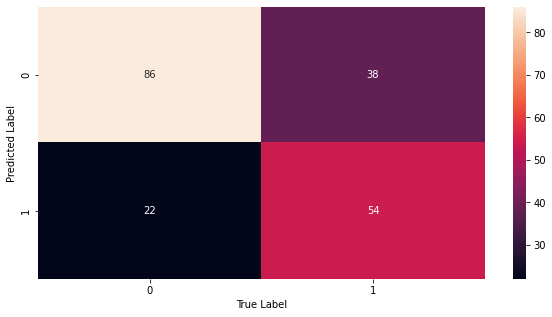



True Positive :  54
True Negative :  86
False Positive :  22
False Negative  :  38


In [12]:
print("Classification Report:")
print(classification_report(test_y, MNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(MNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, MNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [13]:
mae = mean_absolute_error(test_y, MNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.3


In [14]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_MNB = pd.DataFrame({'prediksi':MNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_MNB = pd.DataFrame(df_result_MNB['prediksi'].value_counts()/df_result_MNB['prediksi'].count()*100)
df_persen_MNB

,prediksi
0,62.00%
1,38.00%


#Bernoulli Naive Bayes

In [15]:
BNB = BernoulliNB()
BNB.fit(train_x_tfidf, train_y)

BernoulliNB()

In [16]:
scores = cross_val_score(BNB, train_x_tfidf, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(BNB, train_x_tfidf, train_y, cv=10).mean())

[0.475  0.5125 0.4875 0.4875 0.475  0.475  0.4875 0.5    0.475  0.5375]
K-Fold Mean ->  0.49124999999999996


In [17]:
BNB_pred = BNB.predict(test_x_tfidf)

In [18]:
print(confusion_matrix(BNB_pred, test_y))
print("BNB Accuracy Score -> ",accuracy_score(test_y, BNB_pred)*100)
print("BNB Recall Score -> ",recall_score(test_y, BNB_pred)*100)
print("BNB Precision Score -> ",precision_score(test_y, BNB_pred)*100)
print("BNB f1 Score -> ",f1_score(test_y, BNB_pred)*100)

[[24  1]
 [84 91]]
BNB Accuracy Score ->  57.49999999999999
BNB Recall Score ->  98.91304347826086
BNB Precision Score ->  52.0
BNB f1 Score ->  68.16479400749064


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.22      0.36       108
           1       0.52      0.99      0.68        92

    accuracy                           0.57       200
   macro avg       0.74      0.61      0.52       200
weighted avg       0.76      0.57      0.51       200


Confusion Matrix:


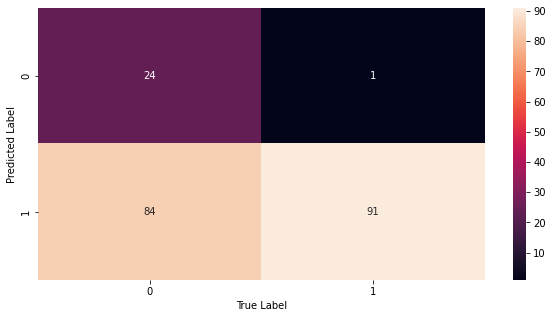



True Positive :  91
True Negative :  24
False Positive :  84
False Negative  :  1


In [19]:
print("Classification Report:")
print(classification_report(test_y, BNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(BNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, BNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [20]:
mae = mean_absolute_error(test_y, BNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.425


In [21]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_BNB = pd.DataFrame({'prediksi':BNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_BNB = pd.DataFrame(df_result_BNB['prediksi'].value_counts()/df_result_BNB['prediksi'].count()*100)
df_persen_BNB

,prediksi
1,87.50%
0,12.50%


#Hitung nilai C

In [22]:
for c in [0.01, 0.05, 0.25, 0.5, 1, 1.01, 1.05, 1.25, 1.5, 2, 2.01, 2.05, 2.25, 2.5, 3]: # Menghitung nilai C
	sv = SVC(C=c)
	sv.fit(train_x_tfidf, train_y)
	print('Accuracy fot C=%s: %s'
	%(c,accuracy_score(test_y, sv.predict(test_x_tfidf)))) 

Accuracy fot C=0.01: 0.54
Accuracy fot C=0.05: 0.54
Accuracy fot C=0.25: 0.54
Accuracy fot C=0.5: 0.555
Accuracy fot C=1: 0.635
Accuracy fot C=1.01: 0.63
Accuracy fot C=1.05: 0.635
Accuracy fot C=1.25: 0.695
Accuracy fot C=1.5: 0.695
Accuracy fot C=2: 0.695
Accuracy fot C=2.01: 0.695
Accuracy fot C=2.05: 0.695
Accuracy fot C=2.25: 0.695
Accuracy fot C=2.5: 0.695
Accuracy fot C=3: 0.695


# Linear

In [23]:
linear = SVC(kernel='linear', C=2)
linear.fit(train_x_tfidf, train_y)

SVC(C=2, kernel='linear')

In [24]:
scores = cross_val_score(linear, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(linear,train_x_tfidf, train_y, cv=10).mean())

[0.7125 0.7125 0.6375 0.6875 0.6    0.5875 0.6875 0.625  0.7    0.7125]
K-Fold Mean ->  0.66625


In [25]:
linear_pred = linear.predict(test_x_tfidf)

In [26]:
print(confusion_matrix(linear_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, linear_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, linear_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, linear_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, linear_pred)*100)

[[88 38]
 [20 54]]
SVM Accuracy Score ->  71.0
SVM Recall Score ->  58.69565217391305
SVM Precision Score ->  72.97297297297297
SVM f1 Score ->  65.06024096385542


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       108
           1       0.73      0.59      0.65        92

    accuracy                           0.71       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.71      0.71       200


Confusion Matrix:


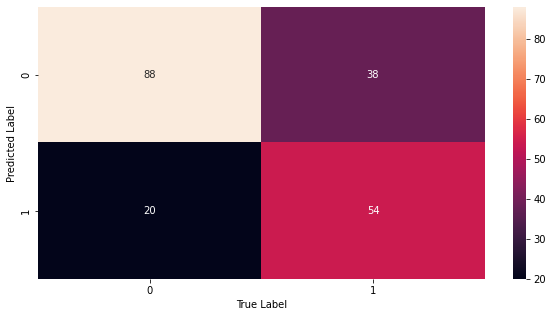



True Positive :  54
True Negative :  88
False Positive :  20
False Negative  :  38


In [27]:
print("Classification Report:")
print(classification_report(test_y, linear_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(linear_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, linear_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [28]:
mae = mean_absolute_error(test_y, linear_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.29


In [29]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_linear = pd.DataFrame({'prediksi':linear_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_linear = pd.DataFrame(df_result_linear['prediksi'].value_counts()/df_result_linear['prediksi'].count()*100)
df_persen_linear

,prediksi
0,63.00%
1,37.00%


# Polynomial 

In [30]:
poly = SVC(kernel='poly', C=2)
poly.fit(train_x_tfidf, train_y)

SVC(C=2, kernel='poly')

In [31]:
scores = cross_val_score(poly, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(poly,train_x_tfidf, train_y, cv=10).mean())

[0.525  0.525  0.525  0.525  0.525  0.525  0.525  0.525  0.525  0.5125]
K-Fold Mean ->  0.52375


In [32]:
poly_pred = poly.predict(test_x_tfidf)

In [33]:
print(confusion_matrix(poly_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, poly_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, poly_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, poly_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, poly_pred)*100)

[[103  82]
 [  5  10]]
SVM Accuracy Score ->  56.49999999999999
SVM Recall Score ->  10.869565217391305
SVM Precision Score ->  66.66666666666666
SVM f1 Score ->  18.691588785046726


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.95      0.70       108
           1       0.67      0.11      0.19        92

    accuracy                           0.56       200
   macro avg       0.61      0.53      0.44       200
weighted avg       0.61      0.56      0.47       200


Confusion Matrix:


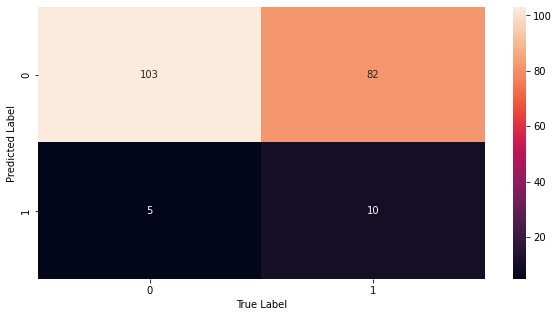



True Positive :  10
True Negative :  103
False Positive :  5
False Negative  :  82


In [34]:
print("Classification Report:")
print(classification_report(test_y, poly_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(poly_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, poly_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [35]:
mae = mean_absolute_error(test_y, poly_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.435


In [36]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_poly = pd.DataFrame({'prediksi':poly_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_poly = pd.DataFrame(df_result_poly['prediksi'].value_counts()/df_result_poly['prediksi'].count()*100)
df_persen_poly

,prediksi
0,92.50%
1,7.50%


# Radial Basis Function

In [37]:
rbf = SVC(kernel='rbf', C=2, gamma=0.50 )
rbf.fit(train_x_tfidf, train_y)

SVC(C=2, gamma=0.5)

In [38]:
scores = cross_val_score(rbf, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(rbf,train_x_tfidf, train_y, cv=10).mean())

[0.675  0.6875 0.625  0.6625 0.6    0.5875 0.6875 0.625  0.6625 0.65  ]
K-Fold Mean ->  0.64625


In [39]:
rbf_pred = rbf.predict(test_x_tfidf)

In [40]:
print(confusion_matrix(rbf_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, rbf_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, rbf_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, rbf_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, rbf_pred)*100)

[[88 39]
 [20 53]]
SVM Accuracy Score ->  70.5
SVM Recall Score ->  57.608695652173914
SVM Precision Score ->  72.6027397260274
SVM f1 Score ->  64.24242424242425


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75       108
           1       0.73      0.58      0.64        92

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200


Confusion Matrix:


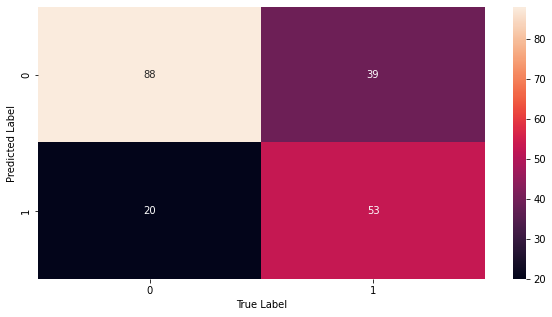



True Positive :  53
True Negative :  88
False Positive :  20
False Negative  :  39


In [41]:
print("Classification Report:")
print(classification_report(test_y, rbf_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(rbf_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, rbf_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)



In [42]:
mae = mean_absolute_error(test_y, rbf_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.295


In [43]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_rbf = pd.DataFrame({'prediksi':rbf_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_RBF = pd.DataFrame(df_result_rbf['prediksi'].value_counts()/df_result_rbf['prediksi'].count()*100)
df_persen_RBF

,prediksi
0,63.50%
1,36.50%


# Sigmoid

In [44]:
sig = SVC(kernel='sigmoid', C=2)
sig.fit(train_x_tfidf, train_y)

SVC(C=2, kernel='sigmoid')

In [45]:
scores = cross_val_score(sig, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(sig,train_x_tfidf, train_y, cv=10).mean())

[0.7125 0.7375 0.675  0.6875 0.5875 0.6125 0.6875 0.6375 0.7    0.7125]
K-Fold Mean ->  0.675


In [46]:
sig_pred = sig.predict(test_x_tfidf)

In [47]:
print(confusion_matrix(sig_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, sig_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, sig_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, sig_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, sig_pred)*100)

[[87 38]
 [21 54]]
SVM Accuracy Score ->  70.5
SVM Recall Score ->  58.69565217391305
SVM Precision Score ->  72.0
SVM f1 Score ->  64.67065868263472


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       108
           1       0.72      0.59      0.65        92

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200


Confusion Matrix:


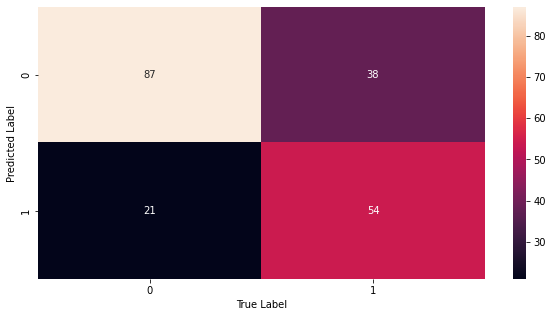



True Positive :  54
True Negative :  87
False Positive :  21
False Negative  :  38


In [48]:
print("Classification Report:")
print(classification_report(test_y, sig_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(sig_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, sig_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [49]:
mae = mean_absolute_error(test_y, sig_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.295


In [50]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_sig = pd.DataFrame({'prediksi':sig_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_sig = pd.DataFrame(df_result_sig['prediksi'].value_counts()/df_result_sig['prediksi'].count()*100)
df_persen_sig

,prediksi
0,62.50%
1,37.50%
